In [7]:
# Importamos las librerías para trabajar con BFS(Breadth-First Search)
# Búsqueda en amplitud

import networkx as nx
import heapq

import matplotlib.pyplot as plt
from collections import deque

In [8]:
grafo = {
    "A":{"B":3,"G":9,"S":5},
    "B":{"A":3,"C":1,"S":9,"X":7},
    "C":{"B":1,"D":2,"I":5},
    "D":{"C":2,"E":2,"F":2,"S":6},
    "E":{"D":2,"X":3},
    "F":{"D":2,"G":3},
    "G":{"A":9},
    "I":{"C":5,"J":6,"X":3},
    "S":{"A":5,"B":9,"D":6},
    "X":{"B":7,"E":3,"I":3},
}

In [9]:
# Crear un grafo de NetworkX y agregar nodos y aristas
G = nx.Graph()
for nodo, vecinos in grafo.items():
    for vecino, peso in vecinos.items():
        G.add_edge(nodo, vecino, weight=peso)

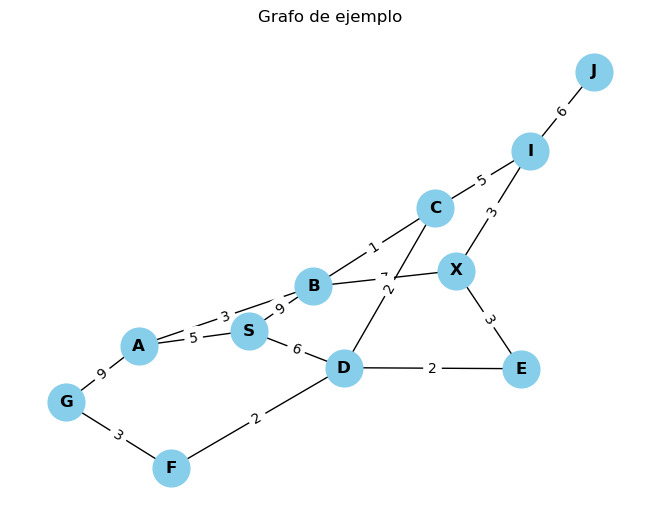

In [10]:
# Dibujar el grafo
pos = nx.spring_layout(G) # Creamos la red de nodos
labels = nx.get_edge_attributes(G, 'weight') # Asignamos los pesos (valores) que se verán en la red
nx.draw(G, pos, with_labels=True, node_size=700, node_color='skyblue', font_size=12, font_weight='bold')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title('Grafo de ejemplo')
plt.show()

In [11]:
# Algoritmo de costo uniforme
def costo_uniforme(inicio, objetivo, grafo):
    cola_prioridad = []
    heapq.heappush(cola_prioridad, (0, inicio, [inicio]))  # Un heap es una estructura de datos 
                                                           # basada en un árbol binario
                                                           # heapq.heappush(heap, item): 
                                                           # Agrega un nuevo elemento al montón.
    visitados = set()
    
    while cola_prioridad:
        costo_actual, nodo_actual, camino = heapq.heappop(cola_prioridad)
                                                           # heapq.heappop(heap):
                                                           # Elimina y devuelve el
                                                           # elemento más pequeño del montón.
        print("--------------------")
        print("Nodos visitados", visitados)
        print("Nodo Actual:", nodo_actual)
        print("Costo Actual:", costo_actual)
        print("Camino:", camino)
        
        if nodo_actual == objetivo:
            return costo_actual, camino
        
        if nodo_actual not in visitados:
            visitados.add(nodo_actual)
            for vecino, costo in grafo[nodo_actual].items():
                if vecino not in visitados: # Visitamos solo los vecinos NO visitados
                    nuevo_costo = costo_actual + costo
                    nuevo_camino = camino + [vecino]
                    heapq.heappush(cola_prioridad, (nuevo_costo, vecino, nuevo_camino))
            print("Cola:", cola_prioridad)

    return float('inf'), []
    

In [12]:
# Calcular el costo mínimo y el camino usando búsqueda de costo uniforme
inicio = 'A'
objetivo = 'X'
costo_minimo, camino_minimo = costo_uniforme(inicio, objetivo, grafo)

# Imprimir el costo mínimo y el camino
if costo_minimo != float('inf'):
    print(f"El costo mínimo desde {inicio} hasta {objetivo} es: {costo_minimo}")
    print(f"El camino mínimo es: {' -> '.join(camino_minimo)}")
else:
    print(f"No se encontró un camino desde {inicio} hasta {objetivo}")


--------------------
Nodos visitados set()
Nodo Actual: A
Costo Actual: 0
Camino: ['A']
Cola: [(3, 'B', ['A', 'B']), (9, 'G', ['A', 'G']), (5, 'S', ['A', 'S'])]
--------------------
Nodos visitados {'A'}
Nodo Actual: B
Costo Actual: 3
Camino: ['A', 'B']
Cola: [(4, 'C', ['A', 'B', 'C']), (9, 'G', ['A', 'G']), (5, 'S', ['A', 'S']), (12, 'S', ['A', 'B', 'S']), (10, 'X', ['A', 'B', 'X'])]
--------------------
Nodos visitados {'B', 'A'}
Nodo Actual: C
Costo Actual: 4
Camino: ['A', 'B', 'C']
Cola: [(5, 'S', ['A', 'S']), (6, 'D', ['A', 'B', 'C', 'D']), (9, 'I', ['A', 'B', 'C', 'I']), (12, 'S', ['A', 'B', 'S']), (9, 'G', ['A', 'G']), (10, 'X', ['A', 'B', 'X'])]
--------------------
Nodos visitados {'C', 'B', 'A'}
Nodo Actual: S
Costo Actual: 5
Camino: ['A', 'S']


KeyError: 'S'